# Figure 5 script

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl

In [2]:
font = {'size'   : 20}
mpl.rc('font', **font)
mpl.rc('legend', fontsize=16)
axes_settings = {'linewidth'   : 2}
mpl.rc('axes', **axes_settings)

In [3]:
df = pd.read_csv('../results_2022.csv', dtype=str)
df = df.replace('varying: multi-pass', 0)   # replace some values in 'Template size (m)' with another flag
for field in ['Pixel spacing (m)',
              'Template size (m)',
              'SAV-uncertainty-x',
              'SAV-uncertainty-y',
              'SAV-peak-x',
              'SAV-peak-y',
              'LSR-uncertainty-nm',
              'LSR-uncertainty-sh',
              'pt0_vxdiff',
              'pt0_vydiff',
              'pt1_vxdiff',
              'pt1_vydiff',
              'pt2_vxdiff',
              'pt2_vydiff',
              'pt0_vxavgdiff',
              'pt0_vyavgdiff',
              'pt1_vxavgdiff',
              'pt1_vyavgdiff',
              'pt2_vxavgdiff',
              'pt2_vyavgdiff',
              'SAV-outlier-percent',
              'Invalid-pixel-percent']:
    df[field] = df[field].astype(float)

datestrs = ['LS8-20180304-20180405', 'LS8-20180802-20180818', 'Sen2-20180304-20180314', 'Sen2-20180508-20180627']

# df

In [4]:
df['large_vxdiff'] = np.abs(df['pt0_vxdiff']) > df['SAV-uncertainty-x']
df['large_vydiff'] = np.abs(df['pt0_vydiff']) > df['SAV-uncertainty-y']
df['large_vxavgdiff'] = np.abs(df['pt0_vxavgdiff']) > df['SAV-uncertainty-x']
df['large_vyavgdiff'] = np.abs(df['pt0_vyavgdiff']) > df['SAV-uncertainty-y']
df['Invalid+Incorrect'] = df['Invalid-pixel-percent'] + df['SAV-outlier-percent'] * (1 - df['Invalid-pixel-percent'] / 100)

df['large_vxdiff'] = df['large_vxdiff'].astype(str)

In [5]:
# for idx, row in df.iterrows():
#     if row['SAV-uncertainty-x'] <= 0.1:
#         df.loc[idx, 'SAV-uncertainty-x (class)'] = "x <= 0.1"
#     elif row['SAV-uncertainty-x'] <= 0.2:
#         df.loc[idx, 'SAV-uncertainty-x (class)'] = "0.1 < x <= 0.2"
#     elif row['SAV-uncertainty-x'] <= 0.3:
#         df.loc[idx, 'SAV-uncertainty-x (class)'] = "0.2 < x <= 0.3"
#     elif row['SAV-uncertainty-x'] <= 0.4:
#         df.loc[idx, 'SAV-uncertainty-x (class)'] = "0.3 < x <= 0.4"
#     elif row['SAV-uncertainty-x'] <= 0.5:
#         df.loc[idx, 'SAV-uncertainty-x (class)'] = "0.4 < x <= 0.5"
#     else:
#         df.loc[idx, 'SAV-uncertainty-x (class)'] = "x > 0.5"

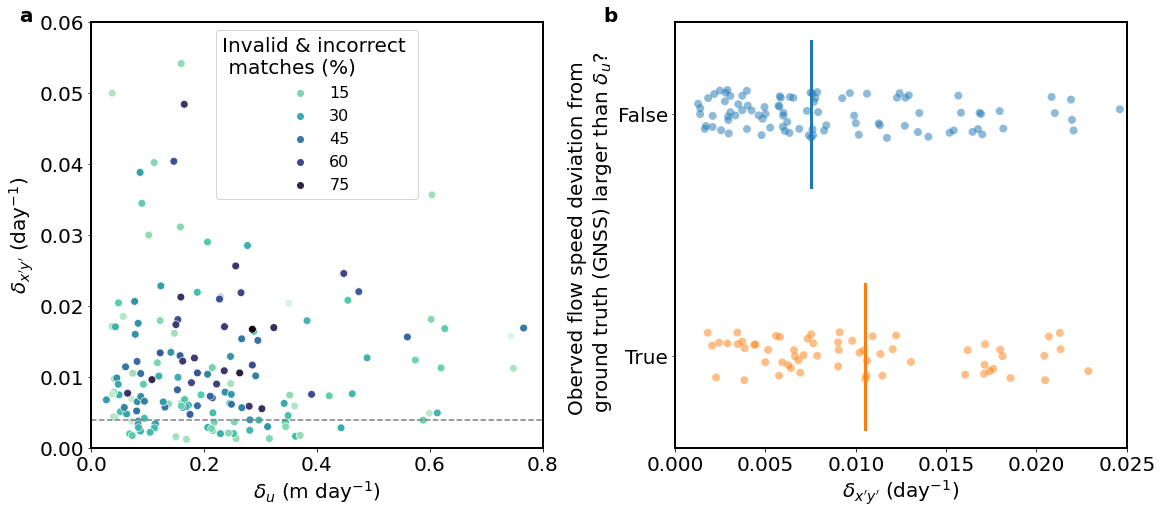

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(16, 7), constrained_layout=True)
axs[0].axhline(y=0.004, linestyle='--', color='gray') 
sns.scatterplot(data=df, x='SAV-uncertainty-x', y='LSR-uncertainty-sh', hue='Invalid+Incorrect', palette="mako_r", ax=axs[0], s=60)
axs[0].set_ylim(0, 0.06)
axs[0].set_xlim(0, 0.8)
sns.stripplot(data=df, x="LSR-uncertainty-sh", y="large_vxdiff", s=8, alpha=0.5, 
             ax=axs[1])
# sns.stripplot(data=df, x="large_vxdiff", y="LSR-uncertainty-sh", palette="mako",
#              ax=axs[1])
# sns.stripplot(data=df, x="LSR-uncertainty-sh", y="large_vxdiff", hue="SAV-uncertainty-x (class)", palette="mako", 
#               hue_order=["x <= 0.1", "0.1 < x <= 0.2", "0.2 < x <= 0.3", "0.3 < x <= 0.4", "0.4 < x <= 0.5", "x > 0.5"], ax=axs[1])
# sns.scatterplot(data=df, x='SAV-uncertainty-y', y='LSR-uncertainty-sh', hue='large_vydiff', ax=axs[1])
# axs[1].set_ylim(0, 0.02)
kawgs2 = {'linewidth': 3, }

tmp = df[df['large_vxdiff'] == 'False']
tmp_mean = tmp['LSR-uncertainty-sh'].median()
axs[1].plot([tmp_mean, tmp_mean], [-0.3, 0.3], **kawgs2)

tmp = df[df['large_vxdiff'] == 'True']
tmp_mean = tmp['LSR-uncertainty-sh'].median()
axs[1].plot([tmp_mean, tmp_mean], [0.7, 1.3], **kawgs2)

axs[1].set_xlim(0, 0.025)
# axs[1].set_ylim(0, 0.025)

axs[0].text(-0.16, 1, "$\mathbf{a}$", transform=axs[0].transAxes)
axs[1].text(-0.16, 1, "$\mathbf{b}$", transform=axs[1].transAxes)

axs[0].set_xlabel('$\delta_u$ (m day$^{-1}$)')
axs[0].set_ylabel("$\delta_{x'y'}$ (day$^{-1}$)") 
axs[0].get_legend().set_title("Invalid & incorrect \n matches (%)")
axs[1].set_xlabel("$\delta_{x'y'}$ (day$^{-1}$)")
axs[1].set_ylabel("Oberved flow speed deviation from \n ground truth (GNSS) larger than $\delta_u$?")

# save figure
fig.patch.set_facecolor('xkcd:white')
fig.savefig('Fig5.png', dpi=200)